## Goal of this Notebook

Simulate random walks. We can add more paramaters later like cost of walk or slippage, which would be analagous to commissions and fees. 

The [kelly bet](https://en.wikipedia.org/wiki/Kelly_criterion) is calculated on a 1:1 payoff. We can also enhance the functionality of the kelly bet to account for different payoffs and losses with different probabilities. 

In [2]:
from stock_utils import *

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt
import random

In [4]:
def run_random_walks(starting_value, stride_length, p, n_steps, n_trials):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []
    
    for i in range(n_trials):
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)
    
    return trial_results

In [5]:
def run_random_walks_kelly(starting_value, p, n_steps, n_trials):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []
    
    for i in range(n_trials):
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            stride_length = int((2 * p - 1) * value) ## Kelly
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)
    
    return trial_results

### Starting Value is 1000, Stride length is 10, p=1/2

In [6]:
starting_value = 1000
stride_length = 10 ## If success, add stride_length. If failure, subtract stride_length
p = 1/2            ## Chance of success
n_trials = 100     ## Number of random walks starting at the base value
n_steps = 1000     ## Number of steps to take on our random walk

trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)


Plot results of the random walk

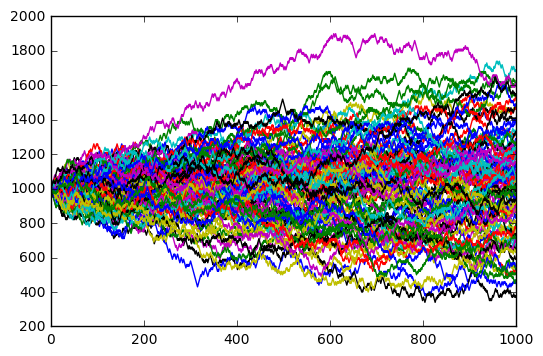

In [7]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's see what happens if we gain a 3% edge

In [8]:
p = 0.53
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

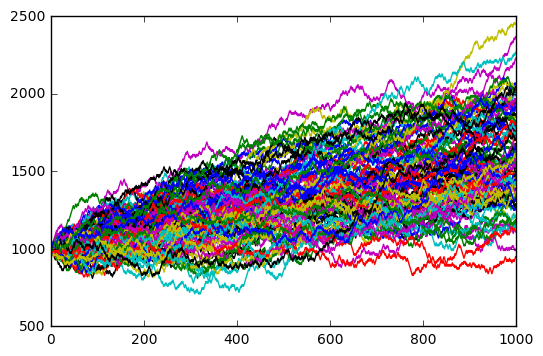

In [9]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's bet bigger!

In [10]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

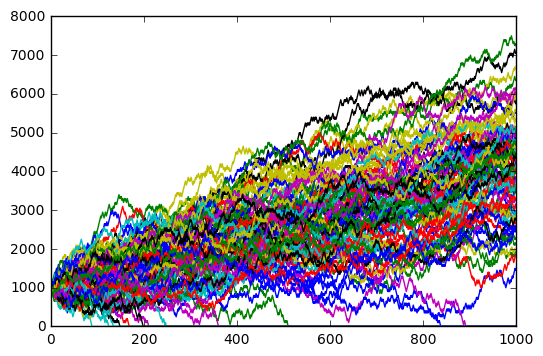

In [11]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### 5% edge

In [12]:
p = 0.55
stride_length = 10
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

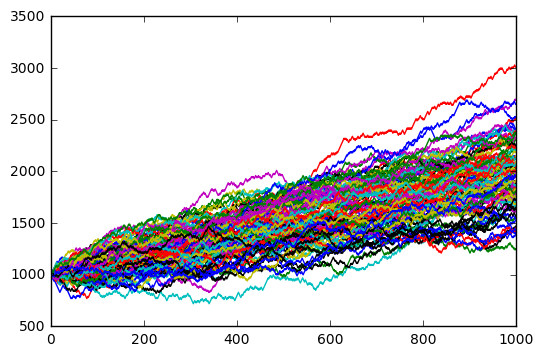

In [13]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

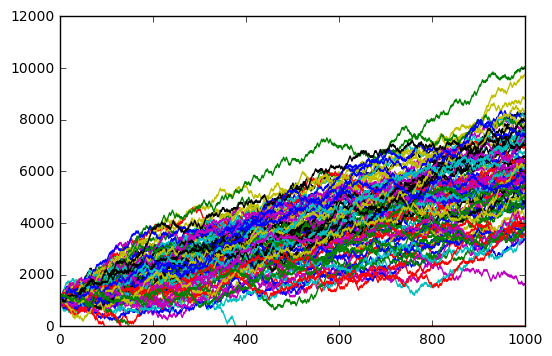

In [14]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

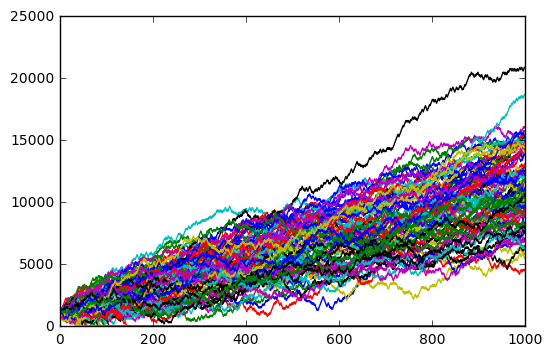

In [15]:
stride_length = 100
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

## Now let's try a dynamic random walk where the stride_length is determined by the Kelly Criterion

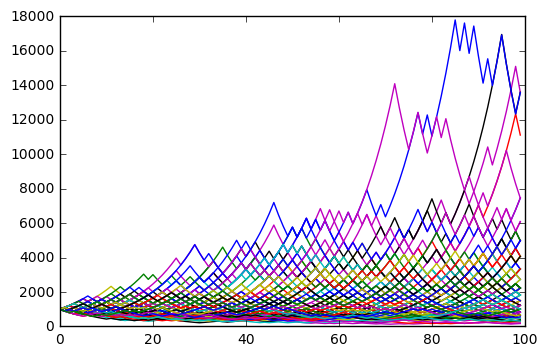

Mean of final values is 2463.89
Median of final values is 1495.5


In [16]:
starting_value = 1000
p = 0.55
n_steps = 100
trial_results = run_random_walks_kelly(starting_value, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

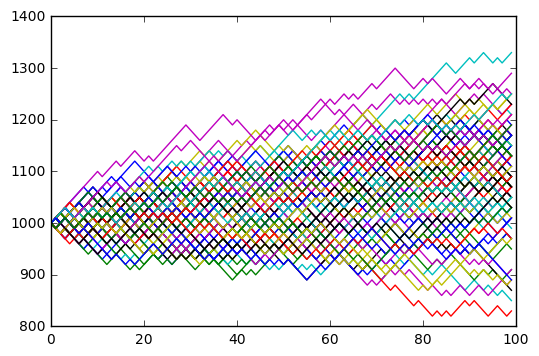

Mean of final values is 1090.4
Median of final values is 1090.0


In [17]:
p = 0.55
n_steps = 100
stride_length = 10
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

## Gaussian Random Walk

In [18]:
def run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials):
    """
    Run 1D random gaussian walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      mu             -- Average percent value of stride length
      sigma          -- Average percent standard deviation
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    We are assuming no "edge" to tilt things in our favor
    """
    trial_results = []

    
    for i in range(n_trials):
        step_multipliers = np.random.normal(mu, sigma, n_steps) / 100
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            if (value <= 0):
                value = 0
            value = value + step_multipliers[j] * value
        trial_results.append(values)
    
    step_multipliers
    return trial_results

In [19]:
df = pd.DataFrame()
df = df.from_csv('spy.csv')
daily_movements = get_price_movements(df)

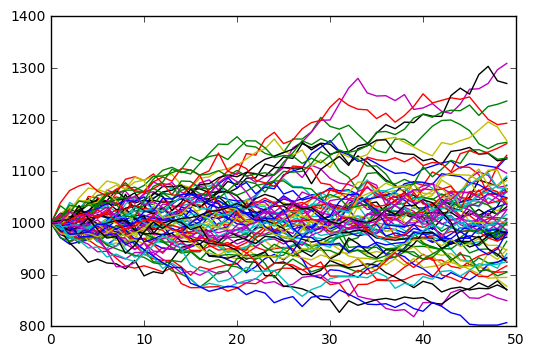

Mean of final values is 1020.2768061
Median of final values is 1008.11709772


In [20]:
starting_value = 1000
mu, sigma = np.mean(daily_movements), np.std(daily_movements)
n_steps = 50
n_trials = 75
trial_results = run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials)

final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

# Let's compare the accuracy of a Gaussian random walk vs. a random walk informed by momentum information
We will use all but the last 50 days as info to learn the mean and standard deviation of price movements to use for Gaussian random walks. (We can always try shorter periods as well). We will also use this same data to train our momentum models. 

We can eventually use this same methodolgy to backtest more sophisticated models such as random forests or neural networks.

Notes:

Test - Use daily movement distribution to generate a random walk for 30 days, then do the same with the momentum distribution, and look at the results. (Use the last 30 days of a few stocks as test data, omit them from training). (How would we interpret different random walks though? Take the mean at each time step or something?)
 - Compare using both a 2 day and 3 day momentum model
 - Can use an overall momentum model from all stocks, stock specific, or a mixture
 - Can also use a mixture model of two day and three day momentum OR use these as features for a boosting algorithm
 
 Develop a few actionable strategies from the notebooks I have so far (and the above test).

In [21]:
df = pd.DataFrame()
df = df.from_csv('spy.csv')
daily_movements = get_price_movements(df)

In [22]:
len(daily_movements)

2519

### 1) Test Gaussian random walk

### For now, use the mean of each trial as the guess

In [23]:
def simulate_movements(movements, starting_value):
    simulation = []
    value = starting_value
    for i in range(len(movements)):
        simulation.append(value)
        value += value * movements[i] * 0.01
    return simulation

In [56]:
prediction_period = 30
prior_daily_movements = daily_movements[0:-prediction_period]
prior_movement_categories = categorize_movements(prior_daily_movements)

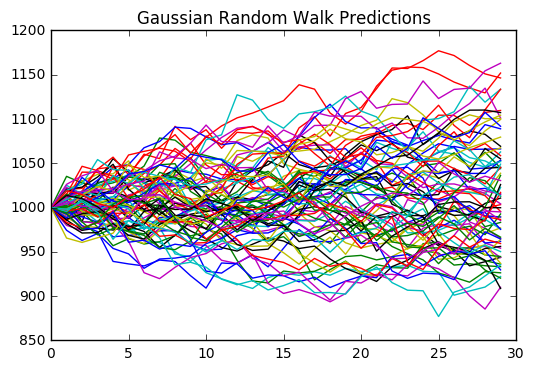

Mean of final values is 1016.03509875
Median of final values is 1012.71282099


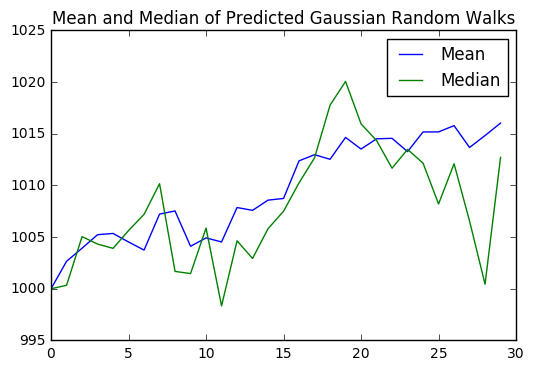

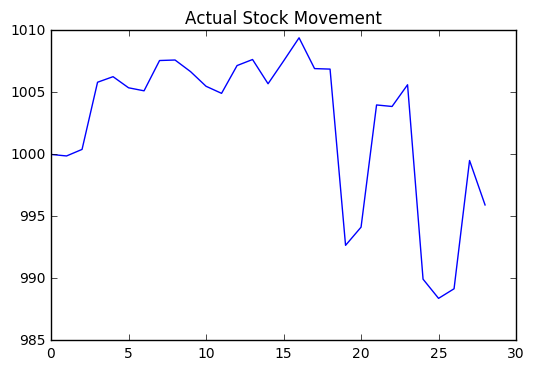

In [57]:
starting_value = 1000
mu, sigma = np.mean(prior_daily_movements), np.std(prior_daily_movements)
n_steps = prediction_period
n_trials = 75

trial_results = run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials)

final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
    total = 0
plt.title('Gaussian Random Walk Predictions')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

mean_values = []
median_values = []
for i in range(n_steps):
    total = 0
    values = []
    for j in range(n_trials):
        total += trial_results[j][i]
        values.append(trial_results[j][i])
    mean_values.append(total / n_trials)
    median_values.append(np.median(values))
        
plt.figure()
plt.title('Mean and Median of Predicted Gaussian Random Walks')
plt.plot(mean_values, label='Mean')
plt.plot(median_values, label='Median')
plt.legend()
plt.figure()
plt.title('Actual Stock Movement')
plt.plot(simulate_movements(daily_movements[-prediction_period:-1], starting_value))
plt.show()

### 2) Test Momentum models

### Two Day Momentum
First step is random, second step is generated by the two day momentum model

In [51]:
## TODO -- fill in

def get_p_given_bd():
    probabilities = [0.25, 0.25, 0.25, 0.25]
    return probabilities

def get_p_given_sd():
    probabilities = [0.25, 0.25, 0.25, 0.25]
    return probabilities

def get_p_given_sg():
    probabilities = [0.25, 0.25, 0.25, 0.25]
    return probabilities

def get_p_given_bg():
    probabilities = [0.25, 0.25, 0.25, 0.25]
    return probabilities

In [58]:
def generate_next_step_two_day(previous_step, probability_distributions):
    p_given_bd = probability_distributions[0]
    p_given_sd = probability_distributions[1]
    p_given_sg = probability_distributions[2]
    p_given_bg = probability_distributions[3]
    ## TODO fill in
    return 0

def generate_next_step_three_day(step_before_last, previous_step, probability_distribution):
    ## TODO fill in
    return 0
    steps.append(generate_next_step(steps[i], probability_distribution))

## First step is random, second step is generated by th

### TODO -- use actual previous movement for first_step

In [59]:
first_step = np.random.normal(mu, sigma, 1)[0]
steps = [first_step]

p_given_bd = get_p_given_bd()
p_given_sd = get_p_given_sd()
p_given_sg = get_p_given_sg()
p_given_bg = get_p_given_bg()

probability_distributions = [p_given_bd, p_given_sd, p_given_sg, p_given_bg]

for i in range(n_steps - 1):
    steps.append(generate_next_step_two_day(steps[i], probability_distributions))

## First step is random, second step is generated by the two day momentum model

In [60]:
starting_value

1000

In [61]:
steps[0]

-2.3190867443058232

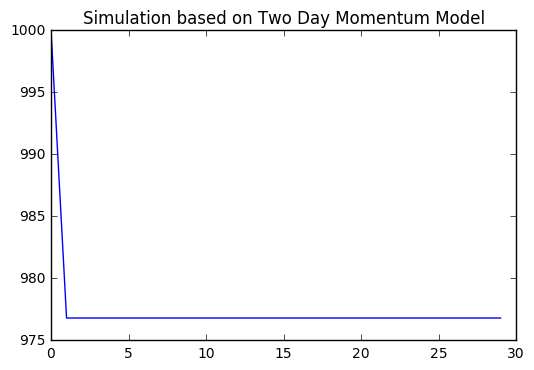

In [62]:
plt.plot(simulate_movements(steps, starting_value))
plt.title('Simulation based on Two Day Momentum Model')
plt.show()

### Three Day Momentum
First step is random, second step is generated by the two day momentum model, third step and onward is generated by the three day momentum model